 # 8. Approximations and Taylor's Series

In [86]:
from itertools import accumulate
from spb import (
    plot,
    plot_list
)
from spb.defaults import cfg
from sympy import (
    cos,
    Derivative,
    Eq,
    exp,
    factorial,
    Function,
    oo,
    pi,
    sin,
    solveset,
    Sum,
    Symbol,
    symbols
)

cfg["matplotlib"]["show_minor_grid"] = True

In [87]:
a, x = symbols('a, x')
f = Function('f')

linear_function = f(a) + (x - a) * f(a).diff(a)

Eq(f(x), linear_function)

Eq(f(x), (-a + x)*Derivative(f(a), a) + f(a))

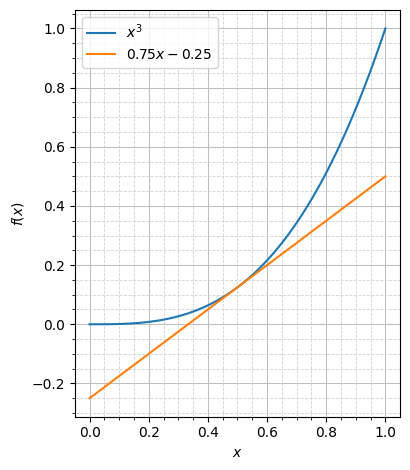

In [88]:
plot(
    x**3,
    linear_function.subs(f(a), a**3).subs(a, .5).doit(),
    (x, 0, 1),
    aspect='equal'
)

In [89]:
xi = Symbol('ξ')

iteration = linear_function + f(xi).diff(xi, xi) * ((x - a)**2 / 2)
iteration

(-a + x)**2*Derivative(f(ξ), (ξ, 2))/2 + (-a + x)*Derivative(f(a), a) + f(a)

In [90]:
iteration_f_subs = {f(a): a**3, f(x): x**3, f(xi): xi**3}
iteration_subs = {a: .25, x: .5}

eq1 = Eq(f(x), iteration).subs(iteration_f_subs).subs(iteration_subs).doit()
eq1

Eq(0.125, 0.1875*ξ + 0.0625)

In [91]:
solveset(eq1, xi)

{0.333333333333333}

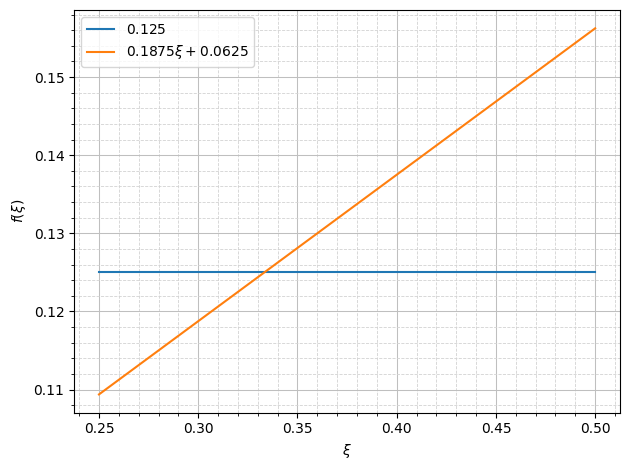

In [92]:
plot(
    (x**3).subs(iteration_subs),
    iteration.subs(iteration_f_subs).subs(iteration_subs).doit(),
    (xi, .25, .5)
)

In [93]:
k, n = symbols('k, n')

ts1 = f(a)
ts2 = Sum(f(a).diff((a, k)) * ((x - a)**k / factorial(k)), (k, 1, n-1))
ts3 = f(xi).diff((xi, n)) * ((x - a)**n / factorial(n))

taylor_special = ts1 + ts2 + ts3
taylor_special

(-a + x)**n*Derivative(f(ξ), (ξ, n))/factorial(n) + f(a) + Sum((-a + x)**k*Derivative(f(a), (a, k))/factorial(k), (k, 1, n - 1))

In [94]:
ts_subs = {
    f(a): a**3,
    f(xi): xi**3
}

taylor_special.subs(ts_subs).subs(iteration_subs).subs(n, 3)

0.00260416666666667*Derivative(ξ**3, (ξ, 3)) + Sum(0.25**k*Subs(Derivative(a**3, (a, k)), a, 0.25)/factorial(k), (k, 1, 2)) + 0.015625

In [95]:
Eq(.5**3, taylor_special.subs(ts_subs).subs(iteration_subs).subs(n, 3)).doit()

True

In [96]:
f_deriv = Derivative(f(a), (a, k)) * ((x - a)**k) / factorial(k)

inf_pow_series = Sum(f_deriv, (k, 0, oo))
inf_pow_series

Sum((-a + x)**k*Derivative(f(a), (a, k))/factorial(k), (k, 0, oo))

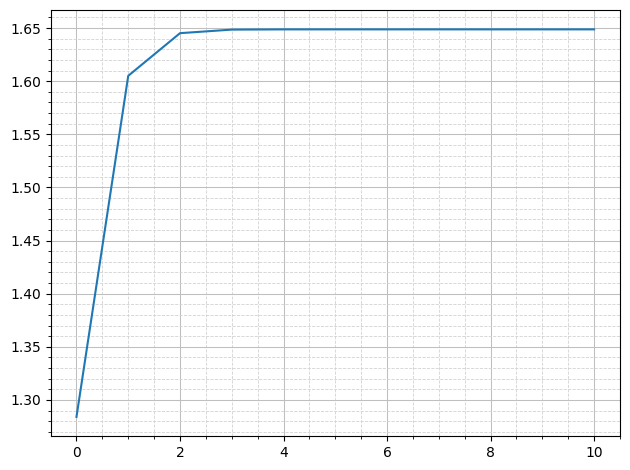

In [97]:
f_deriv_lst = [
    f_deriv.subs(f(a), exp(a)).subs(iteration_subs).subs(k, i).doit()
    for i in range(0, 11)
]

plot_list(
    range(0, 11),
    list(accumulate(f_deriv_lst))
)

In [98]:
exp_x = exp(x).series(n=10)
exp_x

1 + x + x**2/2 + x**3/6 + x**4/24 + x**5/120 + x**6/720 + x**7/5040 + x**8/40320 + x**9/362880 + O(x**10)

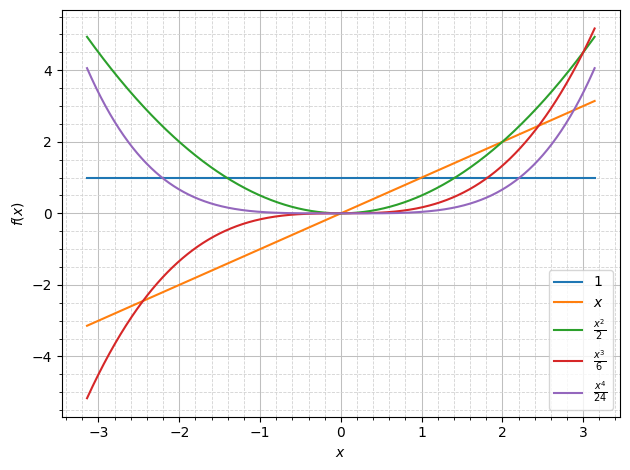

In [99]:
plot(
    *exp_x.as_ordered_terms()[:5],
    (x, -pi, pi)
)

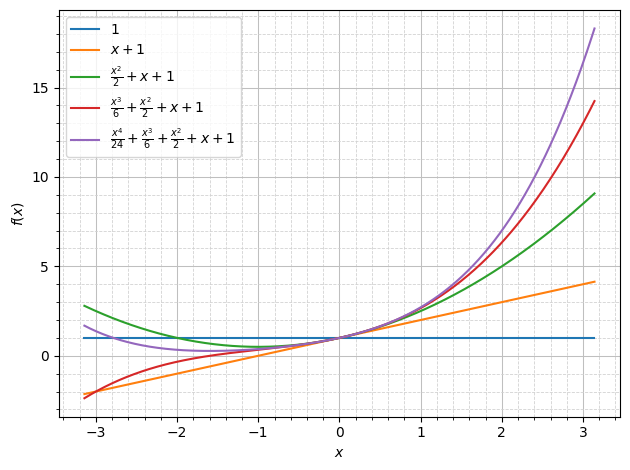

In [100]:
plot(
    *[Add(*exp_x.as_ordered_terms()[:i]) for i in range(1, 6)],
    (x, -pi, pi)
)

In [101]:
sin_x = sin(x).series(n=10)
sin_x

x - x**3/6 + x**5/120 - x**7/5040 + x**9/362880 + O(x**10)

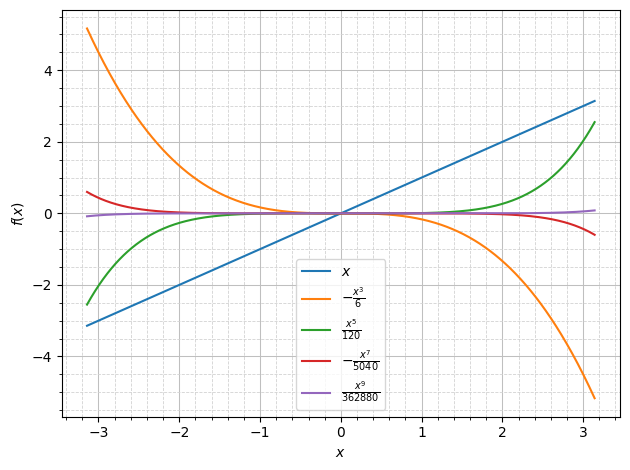

In [102]:
plot(
    *sin_x.as_ordered_terms()[:5],
    (x, -pi, pi)
)

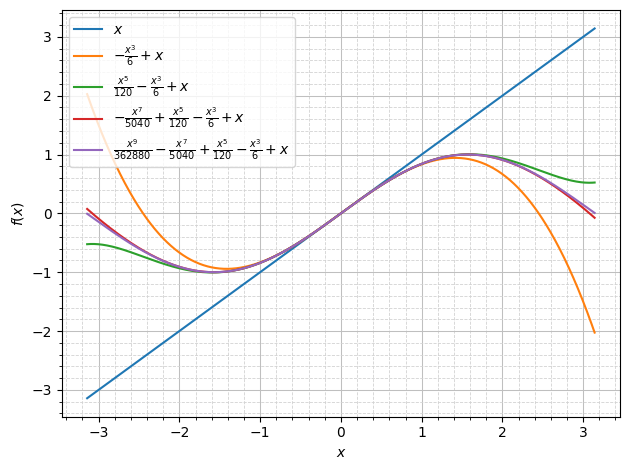

In [103]:
plot(
    *[Add(*sin_x.as_ordered_terms()[:i]) for i in range(1, 6)],
    (x, -pi, pi)
)

In [104]:
cos_x = cos(x).series(n=10)
cos_x

1 - x**2/2 + x**4/24 - x**6/720 + x**8/40320 + O(x**10)

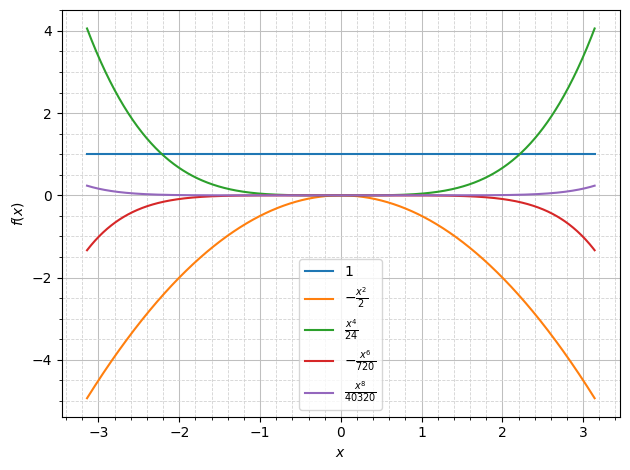

In [105]:
plot(
    *cos_x.as_ordered_terms()[:5],
    (x, -pi, pi)
)

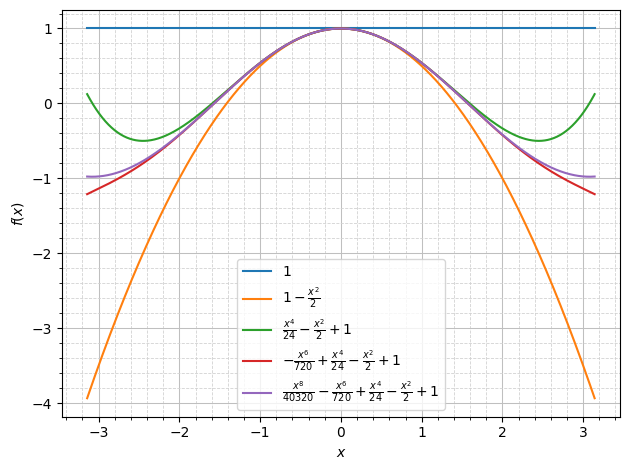

In [106]:
plot(
    *[Add(*cos_x.as_ordered_terms()[:i]) for i in range(1, 6)],
    (x, -pi, pi)
)

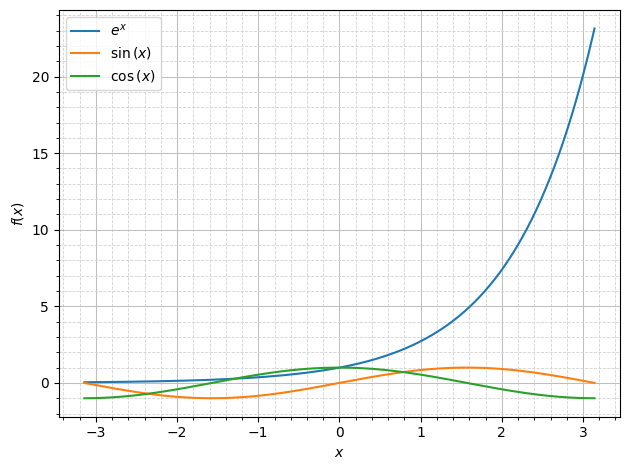

In [107]:
plot(
    exp(x),
    sin(x),
    cos(x),
    (x, -pi, pi)
)